In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df=pd.read_excel(r"D:\Data Science\Assignments\Decision Tree\heart_disease.xlsx",sheet_name=1)

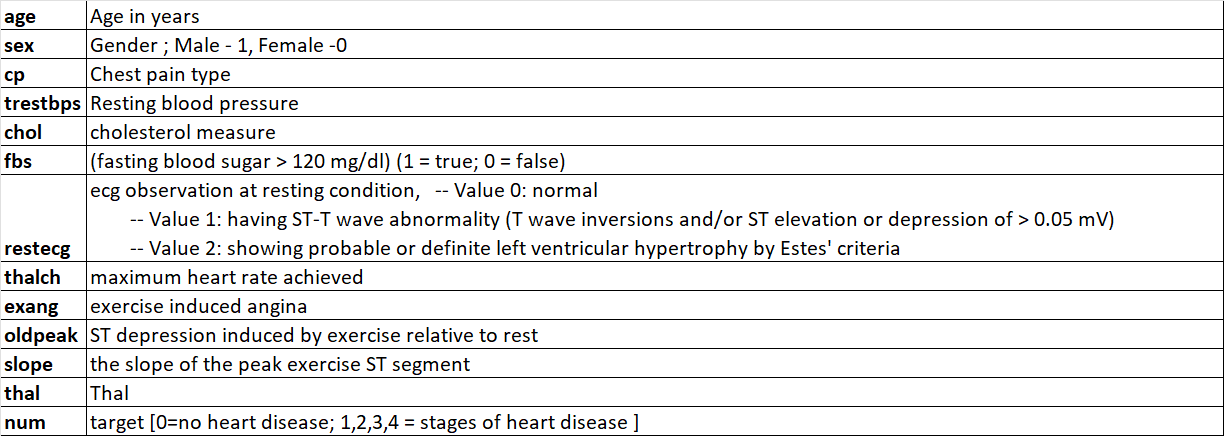

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,normal,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,367,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [7]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in sex: ['Male' 'Female']
Unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values in exang: [False True 'FALSE' 'TURE']
Unique values in slope: ['downsloping' 'flat' 'upsloping']
Unique values in thal: ['fixed defect' 'normal' 'reversable defect']


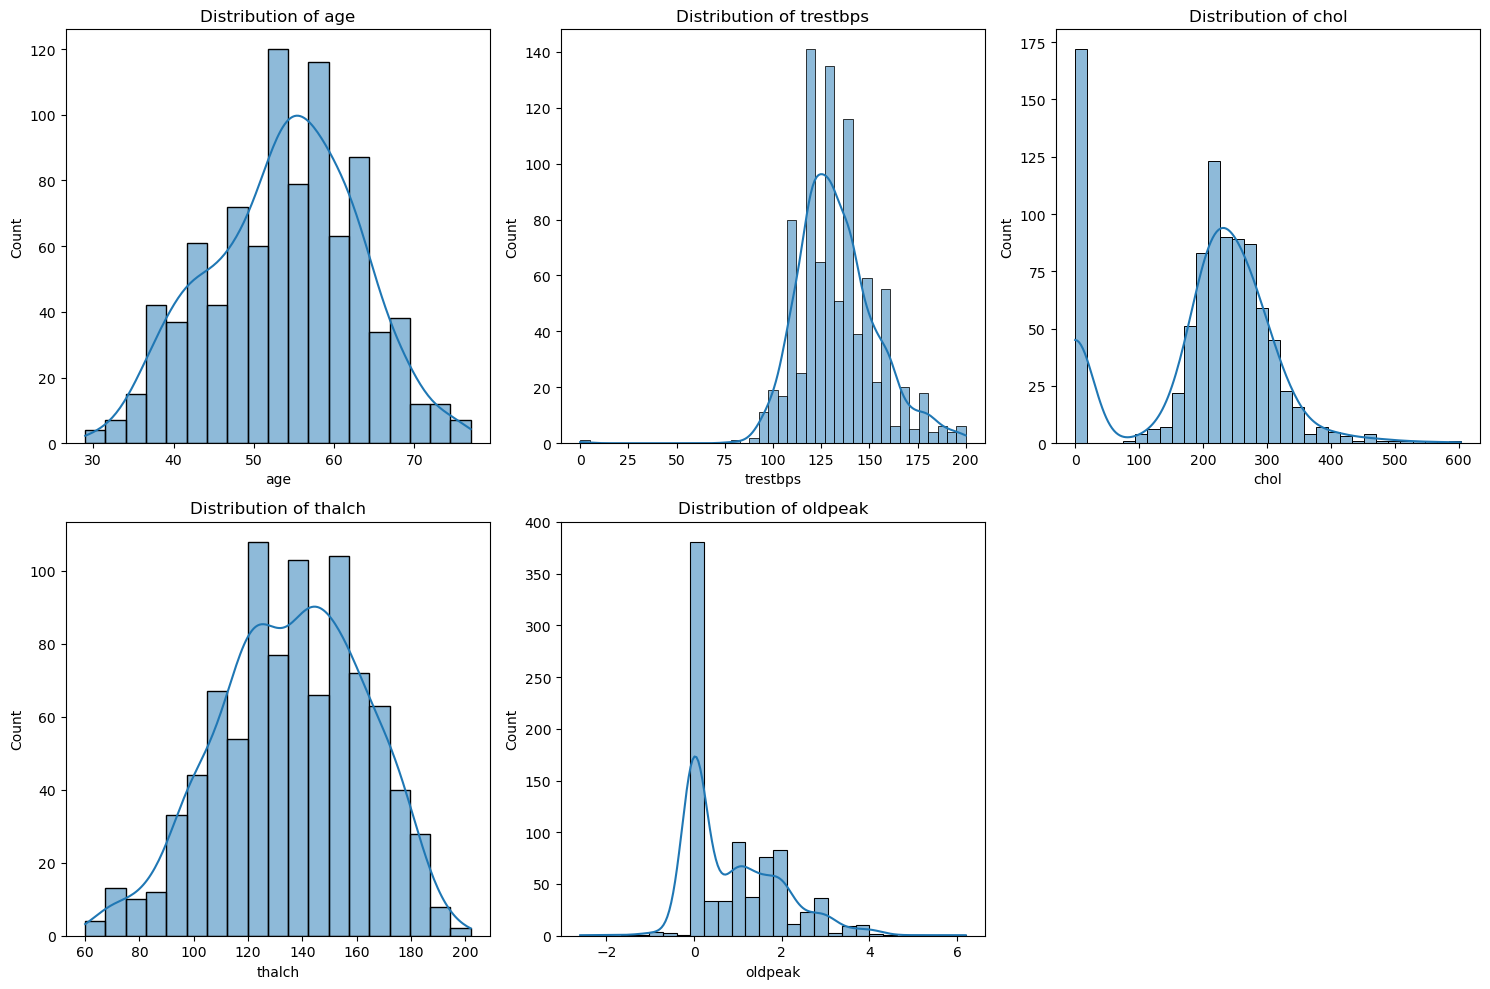

In [8]:
# EDA: Distributions of numerical features
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()



Text(0.5, 1.0, 'Box plot of numerical features')

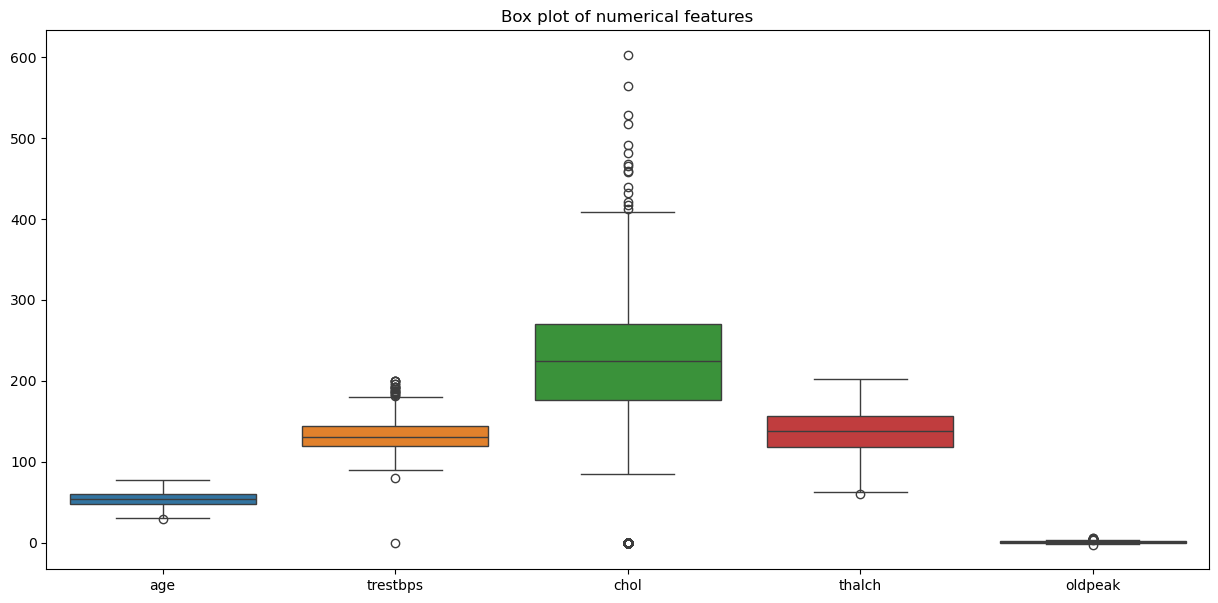

In [9]:

# Box plots for outliers
plt.figure(figsize=(15, 7))
sns.boxplot(data=df[num_cols])
plt.title('Box plot of numerical features')


In [11]:
df['exang'].value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [12]:
# exang is having inconsistency, it should be either True or False converting it to 1 or 0

df['exang'] = df['exang'].astype(str).str.upper().str.strip()

# if it starts with 'T', it's 1. Otherwise, it's 0.

df['exang'] = df['exang'].apply(lambda x: 1 if x.startswith('T') else 0)

# Verify the results
print(df['exang'].value_counts())


exang
0    535
1    373
Name: count, dtype: int64


In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
# filling missing oldpeak values with median
oldpeak_median=np.nanmedian(df['oldpeak'])
df['oldpeak']=df['oldpeak'].fillna(oldpeak_median)

# Verify the results
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
df.select_dtypes(include='object').columns

Index(['sex', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [16]:
df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [17]:
df.slope.value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [18]:
# Feature Engineering
# restecg and slope are ordinal categorical variable so mapping them as per their order

restecg_map={'normal':0,'st-t abnormality':1,'lv hypertrophy':2}
df['restecg']=df['restecg'].map(restecg_map)
slope_map={'upsloping':0,'flat':1,'downsloping':2}
df['slope']=df.slope.map(slope_map)

df = pd.get_dummies(df, columns=['sex', 'cp', 'thal'], drop_first=True)

# Converting boolean columns to int (True becomes 1, False becomes 0)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     908 non-null    int64  
 1   trestbps                908 non-null    int64  
 2   chol                    908 non-null    int64  
 3   fbs                     908 non-null    int32  
 4   restecg                 908 non-null    int64  
 5   thalch                  908 non-null    int64  
 6   exang                   908 non-null    int64  
 7   oldpeak                 908 non-null    float64
 8   slope                   908 non-null    int64  
 9   num                     908 non-null    int64  
 10  sex_Male                908 non-null    int32  
 11  cp_atypical angina      908 non-null    int32  
 12  cp_non-anginal          908 non-null    int32  
 13  cp_typical angina       908 non-null    int32  
 14  thal_normal             908 non-null    in

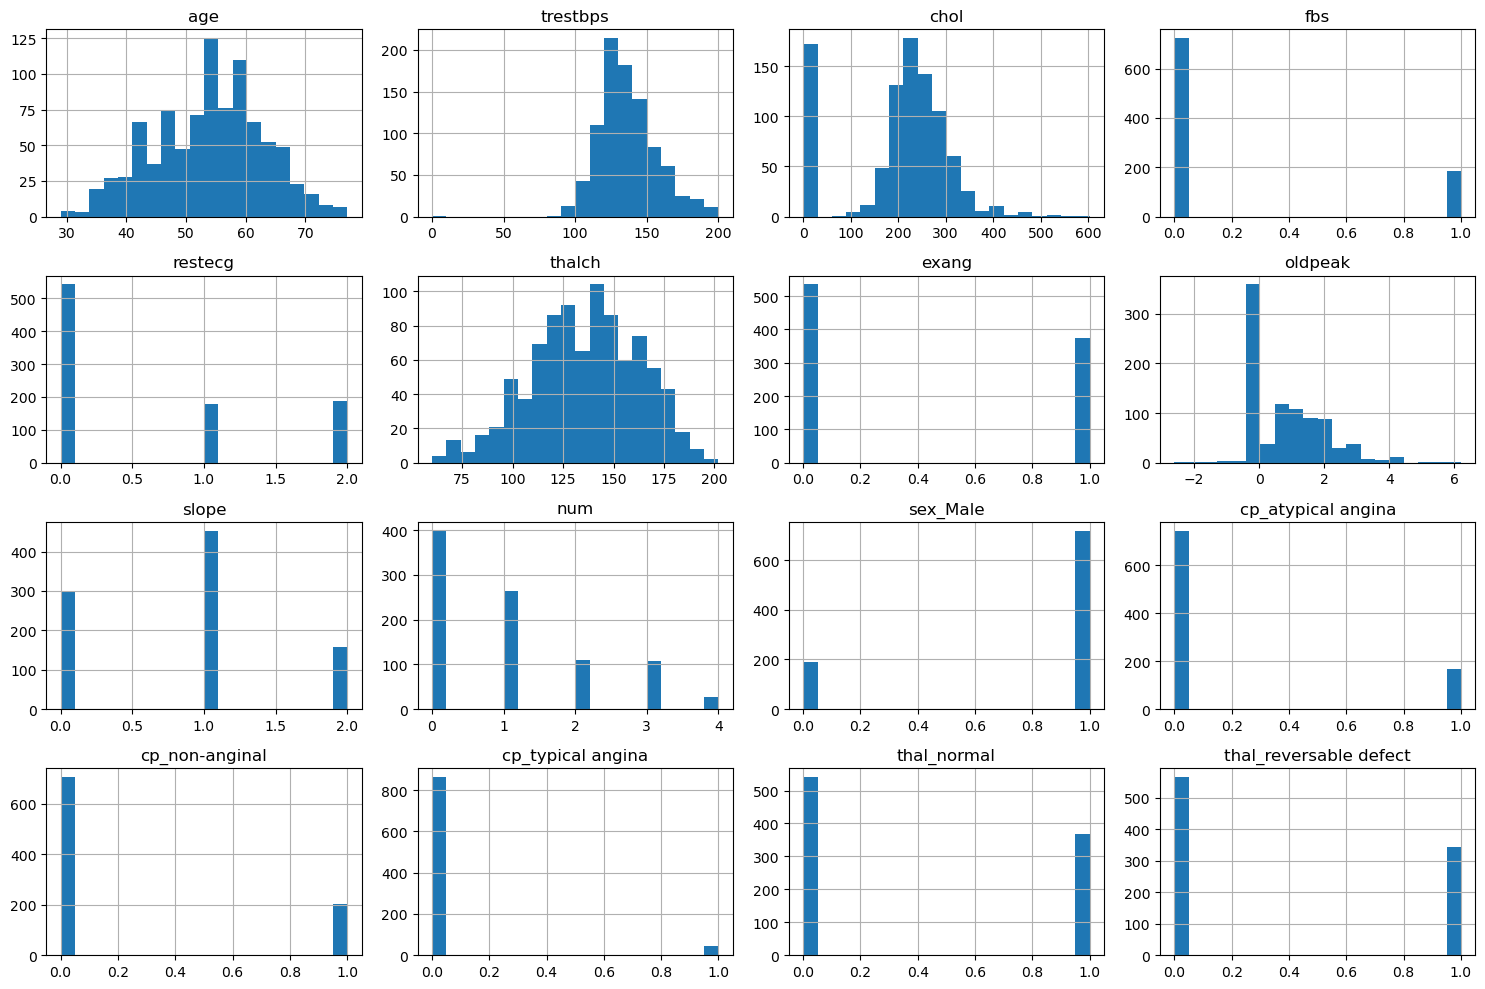

In [20]:
df.hist(figsize=(15,10),bins=20)
plt.tight_layout()

<Axes: >

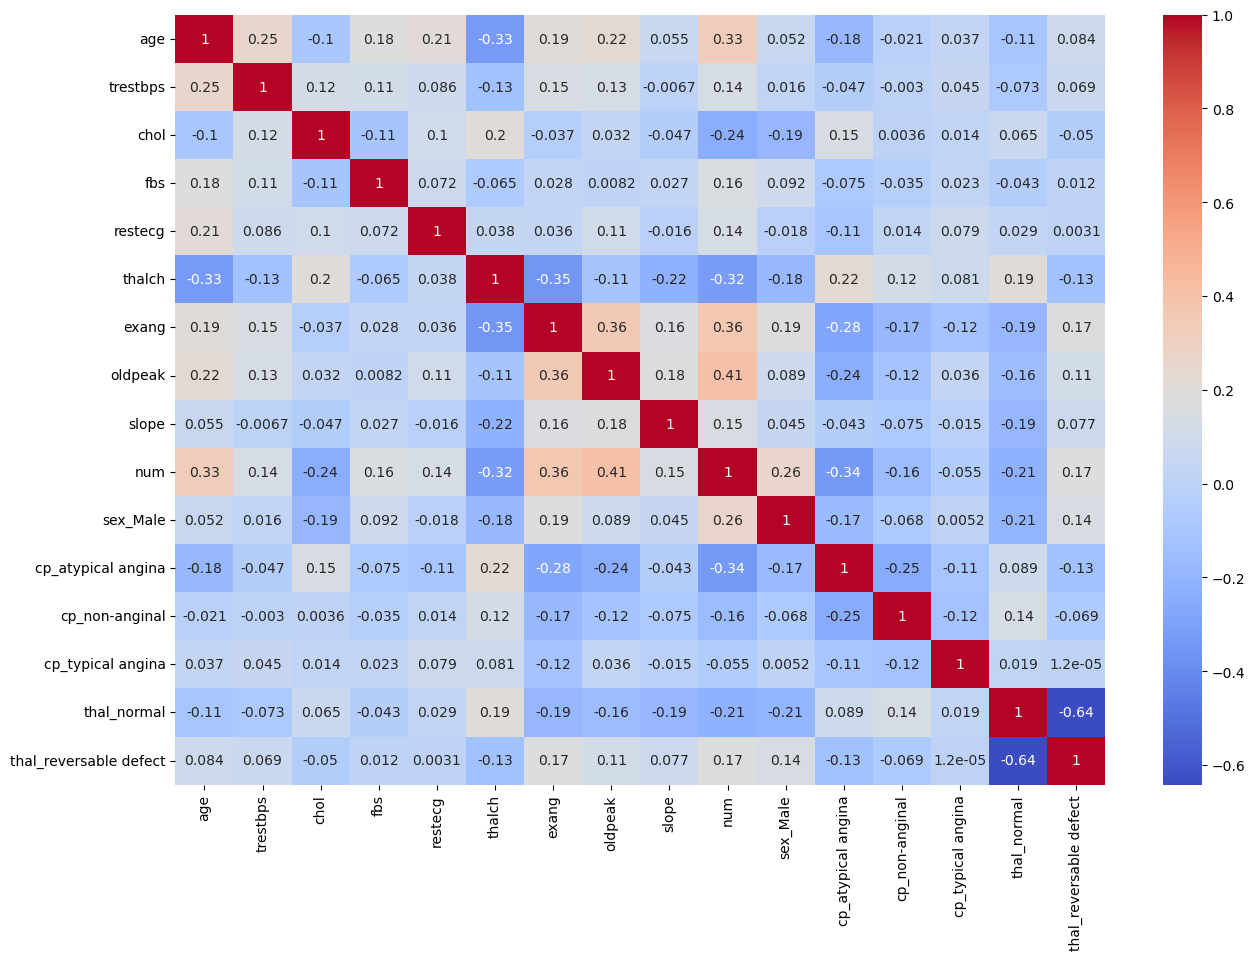

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [23]:
# feature selection
X=df.drop(['num'],axis=1)
Y=df['num']

In [48]:
# spliting data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((726, 15), (726,), (182, 15), (182,))

In [93]:
# Hyperparameter Tuning
params = {
    'criterion': ['gini', 'entropy'],#checks for gini or entropy
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'), params, cv=5)
grid.fit(X_train, Y_train)
best_model = grid.best_estimator_

In [105]:
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_class_weight', 'param_criterion', 'param_max_depth',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [103]:
results_df = pd.DataFrame(grid.cv_results_)
# Sort by rank to see the top performers at the top
results_df[['params', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'class_weight': None, 'criterion': 'gini', 'm...",0.550968,1
1,"{'class_weight': None, 'criterion': 'gini', 'm...",0.550968,1
2,"{'class_weight': None, 'criterion': 'gini', 'm...",0.550968,1
14,"{'class_weight': None, 'criterion': 'entropy',...",0.550940,4
13,"{'class_weight': None, 'criterion': 'entropy',...",0.550940,4


In [109]:
grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 2}

              precision    recall  f1-score   support

           0       0.72      0.82      0.76        89
           1       0.39      0.50      0.44        48
           2        nan      0.00      0.00        22
           3       0.11      0.12      0.11        17
           4        nan      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.40      0.29      0.26       182
weighted avg       0.55      0.54      0.50       182



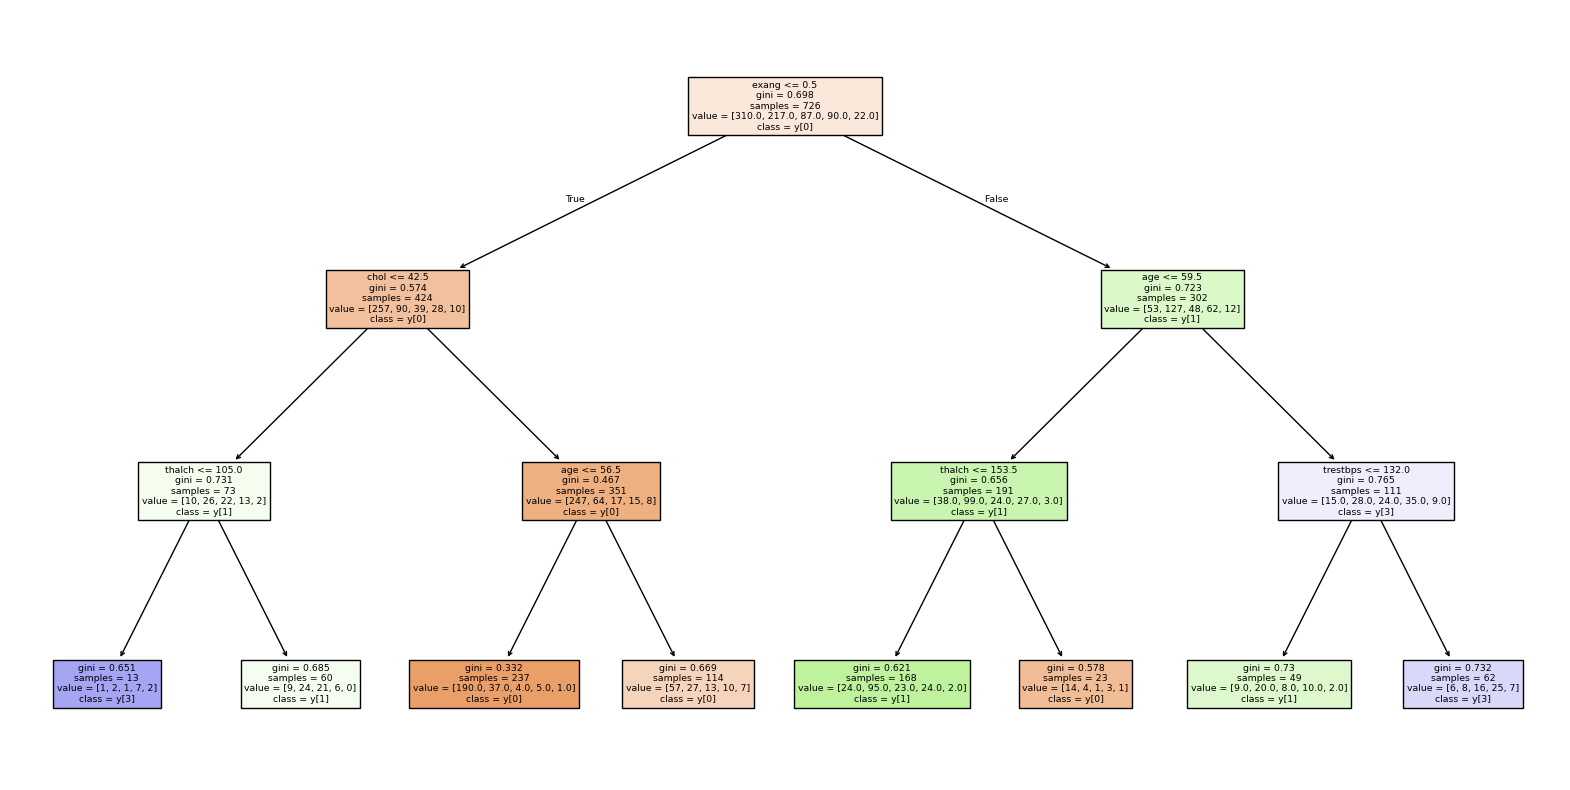

In [116]:
y_pred = best_model.predict(X_test)
print(classification_report(Y_test, y_pred,zero_division=np.nan))

# 5. Visualization
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True, max_depth=3)
plt.show()

During hyperparameter tuning, GridSearchCV evaluated the model both with and without class balancing. Surprisingly, the optimal model selected class_weight=None. This suggests that applying heavy weights to the minority classes (Stages 2-4) resulted in an unacceptable drop in precision for the majority classes (Stages 0-1). The model prioritized the overall stability and accuracy of the majority classifications over the identification of rare extreme stages.

#### What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
##### Criterion: The function to measure the quality of a split (Gini vs. Entropy). This is the math the tree uses to decide where to split
##### max_depth: Controls how deep the tree grows. Deep trees often overfit by memorizing noise.
##### min_depth: The minimum number of samples required to split a node. Higher values prevent the tree from creating branches for very small, specific groups of data.


#### What is the difference between the Label encoding and One-hot encoding?
### Label Encoding vs. One-Hot Encoding:

Label Encoding: Converts categories into integers (0, 1, 2). It is best for Ordinal data where order matters (like slope).

One-Hot Encoding: Creates new binary columns (0/1) for each category. It is best for Nominal data (like cp) to prevent the model from thinking "Atypical Angina" is mathematically "greater" than "Typical Angina."